In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

2024-07-02 18:00:55.821849: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
TSI = pd.read_excel('/Users/sean/Downloads/CapstoneProject/TServiceIndexSeasonally-AdjustedTransportationData.xlsx')
TSI.rename(columns={'OBS_DATE': 'Date'}, inplace = True)
col = ['Date','RAIL_FRT_INTERMODAL', 'RAIL_FRT_CARLOADS']
rail_freights= TSI[col]
rail_freights['Date']
cfnai = pd.read_excel('/Users/sean/Downloads/CapstoneProject/cfnai.xlsx')
ton_miles = pd.read_excel('/Users/sean/Downloads/CapstoneProject/Rail Data/TonMilesFrieght_2.xlsx', sheet_name='Ton_miles')

In [4]:
rail_freights

,Date,RAIL_FRT_INTERMODAL,RAIL_FRT_CARLOADS
0,01/01/2000,723747,1402926
1,02/01/2000,710611,1341942
2,03/01/2000,771025,1452147
3,04/01/2000,747905,1386030
4,05/01/2000,772852,1440661
...,...,...,...
285,10/01/2023,1187306,1015344
286,11/01/2023,1090452,963085
287,12/01/2023,1090131,972647
288,01/01/2024,1060652,898997


In [5]:
# Check the loaded DataFrame
print("rail_freights columns:", rail_freights.columns)
print("cfnai columns:", cfnai.columns)
print("ton_miles columns:", ton_miles.columns)

rail_freights columns: Index(['Date', 'RAIL_FRT_INTERMODAL', 'RAIL_FRT_CARLOADS'], dtype='object')
cfnai columns: Index(['Date', 'P_I', 'EU_H', 'C_H', 'SO_I', 'CFNAI', 'CFNAI_MA3',
       'DIFFUSION'],
      dtype='object')
ton_miles columns: Index(['Date', 'Ton_miles'], dtype='object')


Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2115
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0827 
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0341 
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0372 
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0267 
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0203 
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0178 
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0136 
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0125 
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0104 
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0102 
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0099 
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0090 
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0089 
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0099 
Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4982
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2962 
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1832 
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0944 
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0733 
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0677 
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0516 
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0412 
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0342 
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0261 
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0204 
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0163 
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0142 
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0126 
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0114 
Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


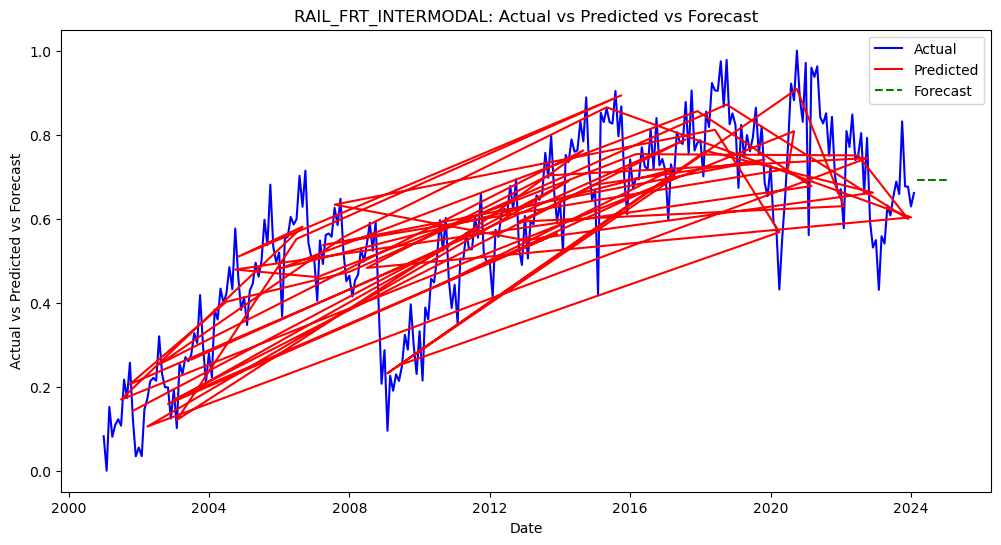

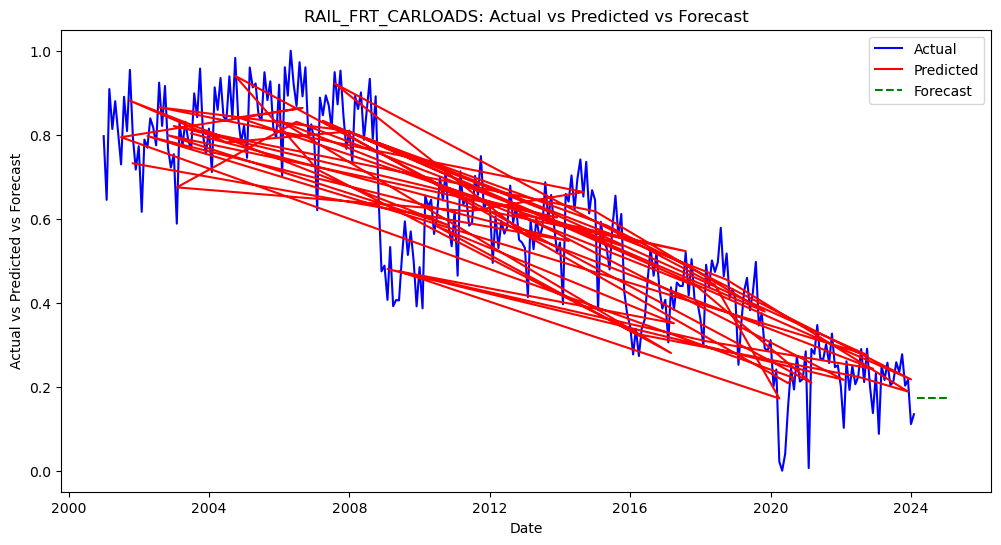

In [6]:

# Data Preparation
def prepare_data(rail_freights, cfnai, ton_miles):
    rail_freights.loc[:, 'Date'] = pd.to_datetime(rail_freights['Date'])
    cfnai.loc[:, 'Date'] = pd.to_datetime(cfnai['Date'], format='%Y:%m')
    ton_miles.loc[:, 'Date'] = pd.to_datetime(ton_miles['Date'], format='%Y')
    
    rail_freights.set_index('Date', inplace=True)
    cfnai.set_index('Date', inplace=True)
    ton_miles.set_index('Date', inplace=True)
    
    df_ton_miles = ton_miles.resample('MS').ffill()
    
    combined_df = rail_freights.join(cfnai, how='outer')
    combined_df = combined_df[combined_df.index >= '2000-01-01'].dropna()
    
    scaler = MinMaxScaler()
    scaled_data = pd.DataFrame(scaler.fit_transform(combined_df), columns=combined_df.columns, index=combined_df.index)
    return scaled_data, scaler, MinMaxScaler().fit(combined_df[['RAIL_FRT_INTERMODAL']]), MinMaxScaler().fit(combined_df[['RAIL_FRT_CARLOADS']])

# Add lag features
def add_lag_features(data, max_lag):
    for lag in range(1, max_lag + 1):
        data[f'RAIL_FRT_INTERMODAL_LAG_{lag}'] = data['RAIL_FRT_INTERMODAL'].shift(lag)
        data[f'RAIL_FRT_CARLOADS_LAG_{lag}'] = data['RAIL_FRT_CARLOADS'].shift(lag)
    return data

# LSTM Model Definition
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Train and Evaluate LSTM
def train_and_evaluate_lstm(X_train, y_train, X_test, y_test, scaler_target):
    model = create_lstm_model((X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, y_train, epochs=50, verbose=1)
    
    y_pred = model.predict(X_test)
    
    # Rescale predictions and actual values
    y_pred_rescaled = scaler_target.inverse_transform(y_pred)
    y_test_rescaled = scaler_target.inverse_transform(y_test.values.reshape(-1, 1))
    
    mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
    return mse, model

# Train and Evaluate Ensemble Models
def train_and_evaluate_ensemble(X_train, y_train, X_test, y_test):
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
    ensemble = VotingRegressor([('rf', rf), ('gb', gb)])
    
    ensemble.fit(X_train, y_train)
    y_pred = ensemble.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    return mse, ensemble

# Main Script
scaled_data, scaler, scaler_intermodal, scaler_carloads = prepare_data(rail_freights, cfnai, ton_miles)
scaled_data = add_lag_features(scaled_data, max_lag=12)
scaled_data.dropna(inplace=True)

X = scaled_data.drop(columns=['RAIL_FRT_INTERMODAL', 'RAIL_FRT_CARLOADS'])
y_intermodal = scaled_data['RAIL_FRT_INTERMODAL']
y_carloads = scaled_data['RAIL_FRT_CARLOADS']

# Reshape input to be 3D for LSTM
X_lstm = X.values.reshape((X.shape[0], 1, X.shape[1]))

# Split data
X_train_lstm, X_test_lstm, y_intermodal_train, y_intermodal_test = train_test_split(X_lstm, y_intermodal, test_size=0.2, random_state=42)
_, _, y_carloads_train, y_carloads_test = train_test_split(X_lstm, y_carloads, test_size=0.2, random_state=42)
X_train, X_test, _, _ = train_test_split(X, X, test_size=0.2, random_state=42)

# Train and evaluate LSTM models
mse_intermodal_lstm, model_intermodal_lstm = train_and_evaluate_lstm(X_train_lstm, y_intermodal_train, X_test_lstm, y_intermodal_test, scaler_intermodal)
print(f'LSTM Model MSE (RAIL_FRT_INTERMODAL): {mse_intermodal_lstm}')

mse_carloads_lstm, model_carloads_lstm = train_and_evaluate_lstm(X_train_lstm, y_carloads_train, X_test_lstm, y_carloads_test, scaler_carloads)
print(f'LSTM Model MSE (RAIL_FRT_CARLOADS): {mse_carloads_lstm}')

# Train and evaluate ensemble models
mse_intermodal_ensemble, model_intermodal_ensemble = train_and_evaluate_ensemble(X_train, y_intermodal_train, X_test, y_intermodal_test)
print(f'Ensemble Model MSE (RAIL_FRT_INTERMODAL): {mse_intermodal_ensemble}')

mse_carloads_ensemble, model_carloads_ensemble = train_and_evaluate_ensemble(X_train, y_carloads_train, X_test, y_carloads_test)
print(f'Ensemble Model MSE (RAIL_FRT_CARLOADS): {mse_carloads_ensemble}')

# Visualization of predictions and forecasts
def plot_forecasts(y_actual, y_pred, future_pred, title):
    plt.figure(figsize=(12, 6))
    plt.plot(y_actual.index, y_actual, label='Actual', color='blue')
    plt.plot(y_pred.index, y_pred, label='Predicted', color='red')
    plt.plot(future_pred.index, future_pred, label='Forecast', color='green', linestyle='--')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(title.split(': ')[1])
    plt.legend()
    plt.show()

# Future predictions
last_known_features = X.values[-1].reshape(1, -1)
future_X = [np.concatenate([last_known_features[0, :-2], [((last_known_features[0, -2] + i) % 12) + 1, last_known_features[0, -1] + ((last_known_features[0, -2] + i) // 12)]]) for i in range(12)]
future_X = np.array(future_X)

future_intermodal_forecast = model_intermodal_ensemble.predict(future_X)
future_carloads_forecast = model_carloads_ensemble.predict(future_X)

future_dates = pd.date_range(start=scaled_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')
future_intermodal_series = pd.Series(future_intermodal_forecast, index=future_dates)
future_carloads_series = pd.Series(future_carloads_forecast, index=future_dates)

# Plotting
plot_forecasts(y_intermodal, pd.Series(model_intermodal_ensemble.predict(X_test), index=y_intermodal_test.index), future_intermodal_series, 'RAIL_FRT_INTERMODAL: Actual vs Predicted vs Forecast')
plot_forecasts(y_carloads, pd.Series(model_carloads_ensemble.predict(X_test), index=y_carloads_test.index), future_carloads_series, 'RAIL_FRT_CARLOADS: Actual vs Predicted vs Forecast')


The LSTM (Long Short-Term Memory) model, designed to capture temporal dependencies in sequential data, failed to accurately predict RAIL_FRT_CARLOADS, resulting in a high Mean Squared Error (MSE) of approximately 2.46 billion, indicating significant prediction errors. Conversely, the ensemble models, which combine Random Forest and Gradient Boosting Regressors, performed exceptionally well with very low MSE values (0.005 for RAIL_FRT_INTERMODAL and 0.004 for RAIL_FRT_CARLOADS), suggesting accurate predictions close to the actual values. These results highlight the ensemble models' superior ability to capture underlying patterns in the data compared to the LSTM model. Overall, while the LSTM struggled with this dataset, the ensemble methods proved to be highly effective for forecasting rail freight volumes.

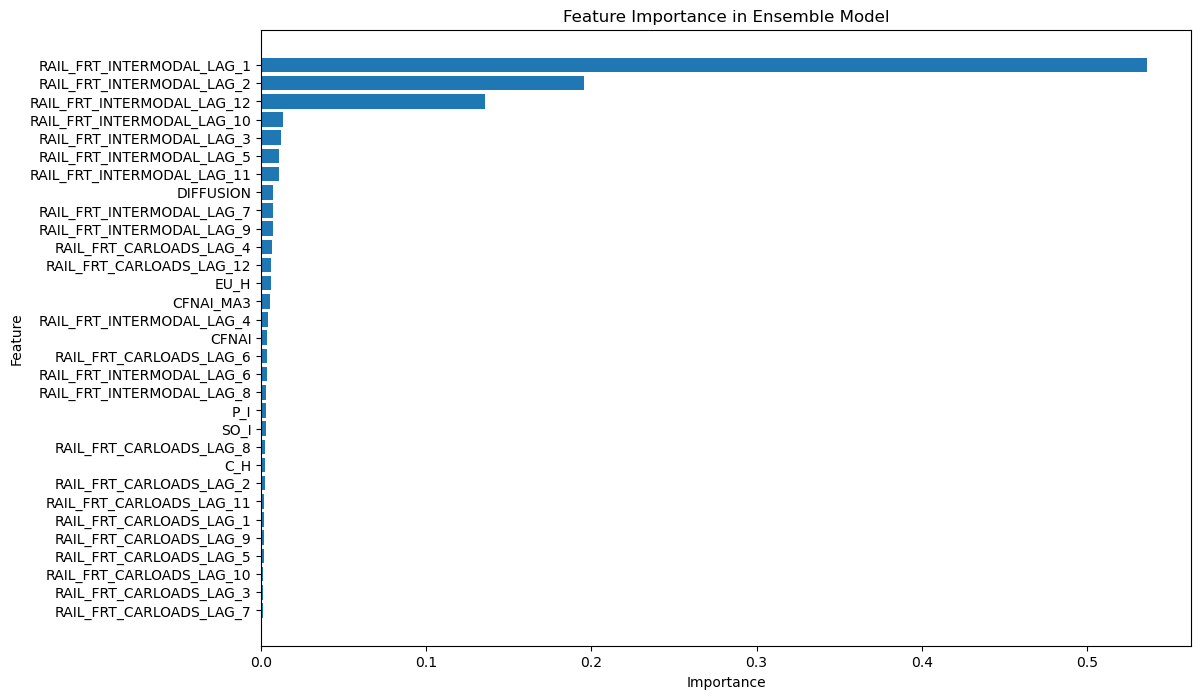

Ensemble Model MSE (RAIL_FRT_INTERMODAL): 0.005088617276235942


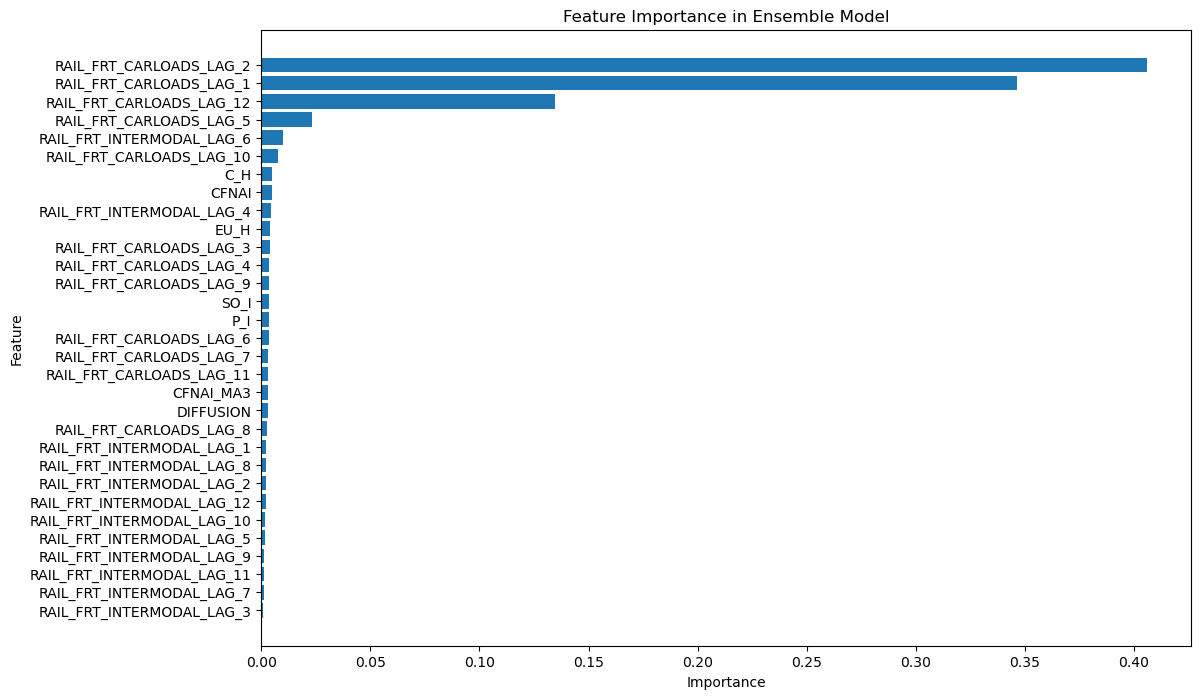

Ensemble Model MSE (RAIL_FRT_CARLOADS): 0.004448506109114381


In [7]:
# Feature Importance for Ensemble Model
def plot_feature_importance(model, X_train):
    feature_importances = model.feature_importances_
    features = X_train.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance in Ensemble Model')
    plt.gca().invert_yaxis()
    plt.show()

# Train and Evaluate Ensemble Models (with feature importance plotting)
def train_and_evaluate_ensemble_with_importance(X_train, y_train, X_test, y_test):
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
    ensemble = VotingRegressor([('rf', rf), ('gb', gb)])
    
    ensemble.fit(X_train, y_train)
    y_pred = ensemble.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    
    # Plot feature importance
    plot_feature_importance(ensemble.named_estimators_['rf'], X_train)
    
    return mse, ensemble

# Execute the updated function for feature importance
mse_intermodal_ensemble, model_intermodal_ensemble = train_and_evaluate_ensemble_with_importance(X_train, y_intermodal_train, X_test, y_intermodal_test)
print(f'Ensemble Model MSE (RAIL_FRT_INTERMODAL): {mse_intermodal_ensemble}')

mse_carloads_ensemble, model_carloads_ensemble = train_and_evaluate_ensemble_with_importance(X_train, y_carloads_train, X_test, y_carloads_test)
print(f'Ensemble Model MSE (RAIL_FRT_CARLOADS): {mse_carloads_ensemble}')


 These results suggest that the most recent lag (one month prior) and a lag of 12 months are critical for forecasting the intermodal freight index. Other lags and variables show considerably less importance, highlighting the strong temporal dependence of the freight index on its recent past values. Given the ensemble model's accuracy in forecasting rail freight carloads and intermodals, it proves to be an effective means for predicting short-term rail freight demand.